## Epsilon-Greedy Theory
- Greed means picking the bandit with highest MLE win rate, with no regard to confidence in prediction or amount of data collected
- Epsilon greedy: have a small probability of doing something random (non-greedy), choose epsilon 5%, 10%
- Details:
    - Exploration: collect data about each bandit


In [ ]:
############################
# Pseudocode
############################
# while True:   
#     p = random number in [0,1] \
#     if p < epsilon:
#       j = choose a random bandit
#     else:
#       argmax(predicted bandit means)
#     x = play bandit j and get reward
#     bandits[j].update_mean(x)

In [ ]:
# Program Layout

# 1) Bandit Class
# Class Bandit:
#     def pull(): ...
#     def update(x):
# 2) epsilon-greedy loop

# 3) plot win rates

In [43]:
import numpy as np
import matplotlib.pyplot as plt
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        # p is the true win rate of each bandit
        self.p = p
        self.p_estimate = 0
        self.N = 0
    def pull(self):
        return int(np.random.random() < self.p)
    
    def update(self, x):
        # x is the data for the bandit, either 0 or 1
        self.N += 1
        self.p_estimate = x/self.N + (self.N-1)/self.N * self.p_estimate
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal_j:", optimal_j)
    for i in range(NUM_TRIALS):
        
        #use epsilon-greedy to select the next badit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
        
        if j == optimal_j:
            num_optimal += 1
            
        # pull the arm for the j-th bandit 
        x = bandits[j].pull()

        # update the reward log
        rewards[i] = x

        # update the the estimate for j-th bandit
        bandits[j].update(x)

    for b in bandits:
        print("mean estimate:{0} (N={1})".format(b.p_estimate, b.N))
        
    #print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum()/ NUM_TRIALS)
    print("num_times_explored:", num_times_explored )
    print("num_times_exploited:", num_times_exploited)
    print("num_times selected optimal bandit:", num_optimal)
    
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

optimal_j: 2
mean estimate:0.2164634146341462 (N=328)
mean estimate:0.43916913946587494 (N=337)
mean estimate:0.751044456347081 (N=9335)
total reward earned: 7230.0
overall win rate: 0.723
num_times_explored: 1005
num_times_exploited: 8995
num_times selected optimal bandit: 9335


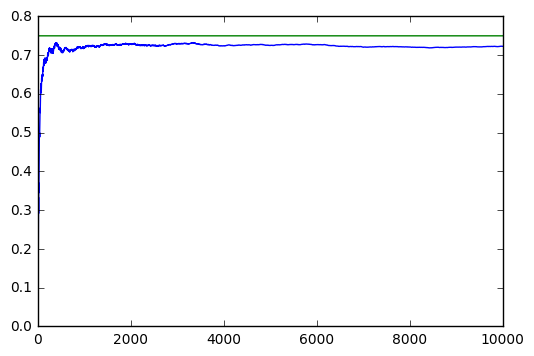

In [44]:
experiment()


# Comparing Different Epsilons
Now we are using real-valued rewards:
$$ Rewards \sim N(\mu, \sigma^2)$$




In [103]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, m):
        # m is the true mean of each bandit
        self.m = m
        self.m_estimate = 0.
        self.N = 0
        
    def pull(self):
        return np.random.randn() + self.m # assume var=1
    
    def update(self, x):
        # x is the data collected for the bandit
        self.N += 1
        self.m_estimate = x/self.N + (self.N-1)/self.N * self.m_estimate
        
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    # Count number of suboptimal choices
    means = np.array([m1, m2, m3])
    true_best = np.argmax(means)
    count_suboptimal = 0
    
    data = np.empty(N)
    num_optimal = 0
    optimal_j = np.argmax([b.m for b in bandits])
    for i in range(N):
        
        #use epsilon-greedy to select the next badit
        if np.random.random() < eps:
            j = np.random.randint(len(bandits))
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        
        if j == optimal_j:
            num_optimal += 1
        else:
            count_suboptimal += 1
            
        # pull the arm for the j-th bandit 
        x = bandits[j].pull()

        # update the reward log
        data[i] = x

        # update the the estimate for j-th bandit
        bandits[j].update(x)
    print("-"*60)
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.plot(np.ones(N)*4)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print("mean estimate:{0} (N={1})".format(b.m_estimate, b.N))
    
    print("percent suboptimal for epsilon = {0}".format( count_suboptimal / N))
    
    return cumulative_average

In [104]:
m1, m2, m3 = 1.5, 2.5, 3.5

------------------------------------------------------------


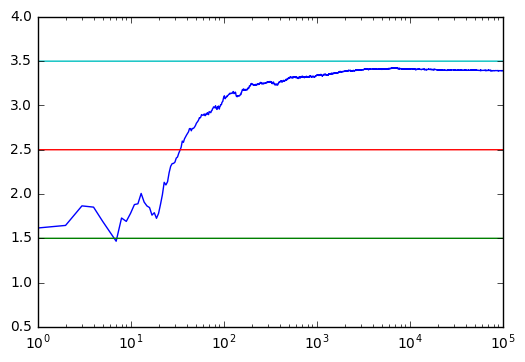

mean estimate:1.5001344961132839 (N=3488)
mean estimate:2.497440536486605 (N=3409)
mean estimate:3.4968515982948087 (N=93103)
percent suboptimal for epsilon = 0.06897
------------------------------------------------------------


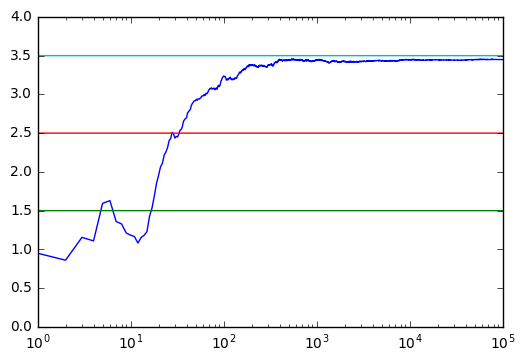

mean estimate:1.4922799376379878 (N=1724)
mean estimate:2.4876599728490705 (N=1672)
mean estimate:3.5003638491040423 (N=96604)
percent suboptimal for epsilon = 0.03396
------------------------------------------------------------


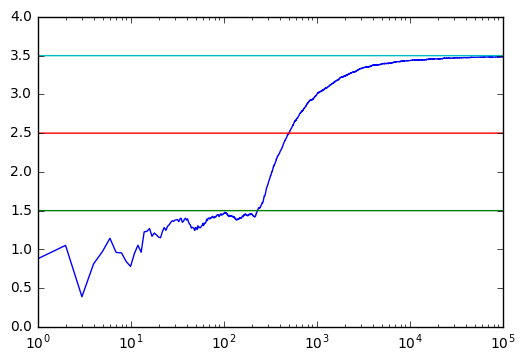

mean estimate:1.4512661299090117 (N=510)
mean estimate:2.546595706449571 (N=371)
mean estimate:3.4962749482516626 (N=99119)
percent suboptimal for epsilon = 0.00881


In [105]:
c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

## Take aways
From the plots above, all converges to the optimal bandit, ~ 3.5. Smaller percent subtimal, closer it converges 

In [106]:
np.random.randn() + 1.5

1.0808633381189678

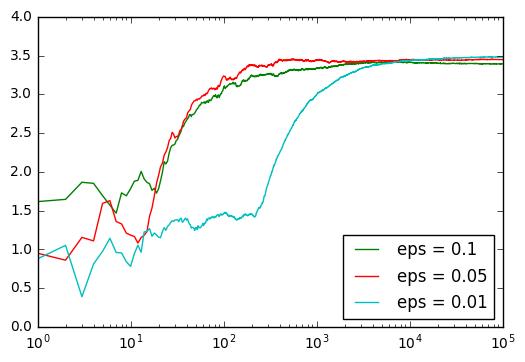

In [107]:
plt.plot(4*np.ones(100000))
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.show()


It's easy to observe that eps=0.01 converges more slowly than eps=0.05 and 0.1

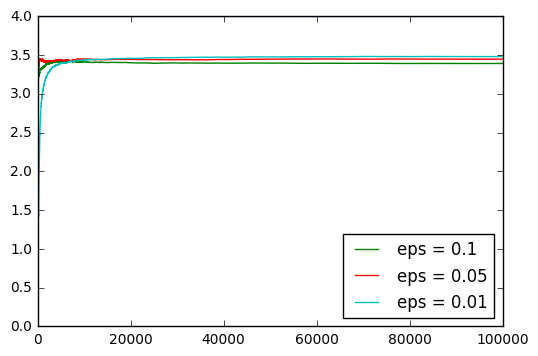

In [108]:
plt.plot(4*np.ones(100000))
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend(loc = 'lower right')
plt.show()

- For higher value of epsilon, the cumulative reward is worse, bacause it has larges chance to get a suboptimal reward.
- There is a trade off: quick conversions or higher eventual reward? We see that eps=0.01 converges slowly, but it has higher eventual reward
- In reality, short experiment means that you can't afford to wait for the reward to converge, choose an higher epsilon?
